# Brazil 1 - 2 Belgium World Cup 2018 QF

[Scatter mlpsoccer](https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_scatter.html)

In [13]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager
from statsbombpy import sb

In [2]:
matches = sb.matches(43,3)

credentials were not supplied. open data access only


In [3]:
be_matches = matches[(matches['home_team'] == 'Belgium') | (matches['away_team'] == 'Belgium')]
be_matches.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
3,7536,2018-06-18,17:00:00.000,International - FIFA World Cup,2018,Belgium,Panama,3,0,available,scheduled,2021-12-06T22:40:10.487423,2021-06-13T16:17:31.694,1,Group Stage,Olimpiyskiy Stadion Fisht (Sochi),Janny Sikazwe,1.0.2,None,None
14,8650,2018-07-06,20:00:00.000,International - FIFA World Cup,2018,Brazil,Belgium,1,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,5,Quarter-finals,Kazan'' Arena (Kazan'),Milorad Mažić,1.0.2,None,None
29,7584,2018-07-02,20:00:00.000,International - FIFA World Cup,2018,Belgium,Japan,3,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,4,Round of 16,Rostov Arena,Malang Diedhiou,1.0.2,None,None
36,7552,2018-06-23,14:00:00.000,International - FIFA World Cup,2018,Belgium,Tunisia,5,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,2,Group Stage,Otkrytiye Arena (Moskva),Jair Marrufo,1.0.2,None,None
50,7570,2018-06-28,20:00:00.000,International - FIFA World Cup,2018,England,Belgium,0,1,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,3,Group Stage,Stadion Kaliningrad,Damir Skomina,1.0.2,None,None


In [4]:
brz_bel = sb.events(8650)

credentials were not supplied. open data access only


In [5]:
shots = brz_bel[['team','minute', 'player', 'shot_end_location', 'shot_outcome', 'shot_statsbomb_xg']]

In [6]:
shots = shots.dropna()

In [9]:
def get_numeric_shots(df):
    
    df['x'] = [i[0] for i in df['shot_end_location'].values]
    df['y'] = [i[1] for i in df['shot_end_location'].values] 
    df = df.drop(['shot_end_location'], axis=1)
    
    return df

shots = get_numeric_shots(shots)

In [ ]:
def scale_shots(df):
    
    df['x'] = 

In [11]:
be_shots = shots[shots['team'] == 'Belgium']

In [20]:
bz_shots = shots[shots['team'] == 'Brazil']

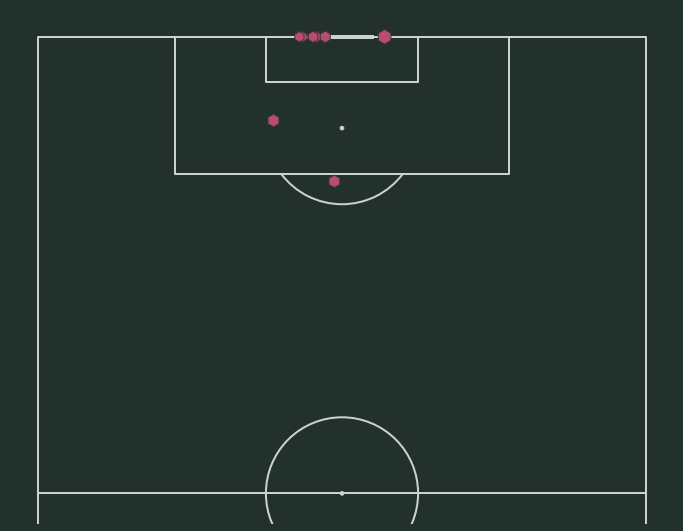

In [29]:
fig, ax = plt.subplots(figsize=(12,10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = VerticalPitch(pitch_type='statsbomb', orientation='vertical', half=True,
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

sc = pitch.scatter(be_shots.x, be_shots.y,
                   # size varies between 100 and 1000 (points squared)
                   s=(be_shots.shot_statsbomb_xg * 900) + 100,
                   c='#b94b75',  # color for scatter in hex format
                   edgecolors='#383838',  # give the markers a charcoal border
                   # for other markers types see: https://matplotlib.org/api/markers_api.html
                   marker='h',
                   ax=ax)

pitch.draw(ax=ax)